In [77]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
data=pd.read_csv('train.csv')

In [79]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [80]:
f1=lambda x: 0 if type(x)== float else 1

In [81]:
data['Cabin'].apply(f1)   #gives 0 if passenger has no cabin and gives 1 if passenger has a cabin

0      0
1      1
2      0
3      1
4      0
5      0
6      1
7      0
8      0
9      0
10     1
11     1
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     1
22     0
23     1
24     0
25     0
26     0
27     1
28     0
29     0
      ..
861    0
862    1
863    0
864    0
865    0
866    0
867    1
868    0
869    0
870    0
871    1
872    1
873    0
874    0
875    0
876    0
877    0
878    0
879    1
880    0
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Cabin, Length: 891, dtype: int64

In [43]:
data['Has_Cabin']=data['Cabin'].apply(f1)   #storing the upper cell in a new column Has_cabin

In [44]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [45]:
data['FamilySize'] = data['SibSp'] + data['Parch'] +1
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,2


In [46]:
data[(data['Embarked']!='S') & (data['Embarked']!='C') & (data['Embarked']!='Q')]   #finding nan values in embarked column 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,1


In [47]:
data[data['Embarked'].isnull()]    #same shortcut operation for upper cell     we can use both (isna) also in place of (isnull)  but cant' use (isnan) becoz (isnan) is use in numpy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,1


In [48]:
data['Embarked'] = data['Embarked'].fillna('S')

In [49]:
data[data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0,1
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,0,1
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1,2
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,0,1
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,0,1
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,0,1


In [50]:
data['Age'].isnull().sum()   #cheking how many nan values are there in age column

177

In [51]:
age_avg = data['Age'].mean()
age_std =data['Age'].std()
age_null_count = data['Age'].isnull().sum()

In [52]:
age_avg   #calculating mean of age

29.69911764705882

In [53]:
age_std  #calculating standard deviation of age    #age_avg-age_std=min age   #age_avg+age_std=max age 

14.526497332334044

In [54]:
age_null_count

177

In [55]:
age_null_random_list=np.random.randint(age_avg - age_std, age_avg + age_std,size=age_null_count)

In [56]:
age_null_random_list

array([34, 37, 23, 33, 18, 18, 28, 15, 41, 17, 38, 18, 39, 32, 27, 22, 36,
       25, 28, 38, 20, 15, 30, 34, 41, 40, 15, 34, 38, 37, 15, 33, 29, 39,
       31, 18, 37, 28, 37, 20, 33, 22, 39, 25, 31, 38, 29, 36, 18, 23, 36,
       30, 39, 42, 30, 20, 25, 28, 22, 31, 40, 22, 31, 41, 28, 26, 38, 26,
       36, 18, 43, 17, 21, 21, 22, 26, 35, 17, 15, 19, 41, 30, 43, 42, 17,
       38, 27, 33, 32, 23, 40, 29, 26, 22, 21, 32, 35, 24, 16, 15, 24, 41,
       42, 32, 19, 37, 15, 36, 32, 40, 17, 30, 36, 29, 41, 15, 35, 20, 43,
       36, 26, 38, 24, 31, 42, 16, 43, 32, 33, 21, 40, 20, 28, 29, 42, 24,
       18, 43, 36, 37, 31, 22, 43, 41, 39, 33, 31, 22, 36, 39, 43, 32, 16,
       36, 41, 30, 30, 37, 15, 36, 24, 30, 19, 21, 15, 15, 38, 19, 29, 29,
       18, 39, 42, 25, 35, 18, 29])

In [57]:
np.isnan(data['Age'])

0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17      True
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28      True
29      True
       ...  
861    False
862    False
863     True
864    False
865    False
866    False
867    False
868     True
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878     True
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [58]:
data.loc[np.isnan(data['Age']),'Age'] = age_null_random_list
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,34.0,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,2


In [59]:
data['Age'] = data['Age'].astype(int)

In [60]:
data['Sex'] = data['Sex'].map ({'female':0,'male':1}).astype(int)

In [61]:
data  #calling female as 0 and male as 1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",1,34,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54,0,0,17463,51.8625,E46,S,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2,3,1,349909,21.0750,NaN,S,0,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27,0,2,347742,11.1333,NaN,S,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14,1,0,237736,30.0708,NaN,C,0,2


# Working on Title

In [62]:
## Define function to extract titles from passenger names
def get_title(name):
    title_search=re.search('([A-Za-z]+\.)',name)   ## Search From A-Z and a-z
  ### If the title exists, extract and return it.
    if title_search:
        return title_search[0]

In [63]:
re.search('([A-Za-z]+\.)','Cuming, Mrs. John Bradley')   ## re.search means Regular search

<re.Match object; span=(8, 12), match='Mrs.'>

In [64]:
zz=re.search('([A-Za-z]+\.)','Cumings, Mrs. John Bradley')    ## ([A-Za-z]+\.) its mean jiske baad (.) ayga wo show krga
                                                                ##  like Mr.,Mrs. Dr.

In [65]:
zz[0]

'Mrs.'

In [66]:
data['Title'] = data['Name'].apply(get_title)

In [67]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S,0,2,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C,1,2,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S,1,2,Mrs.
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S,0,1,Mr.


In [68]:
data['Title']=data['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
data['Title']=data['Title'].replace(['Mlle','Miss'])
data['Title']=data['Title'].replace(['Ms','Miss'])
data['Title']=data['Title'].replace(['Mme','Mrs'])

In [69]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S,0,2,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C,1,2,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S,1,2,Mrs.
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S,0,1,Mr.
5,6,0,3,"Moran, Mr. James",1,34,0,0,330877,8.4583,NaN,Q,0,1,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",1,54,0,0,17463,51.8625,E46,S,1,1,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2,3,1,349909,21.0750,NaN,S,0,5,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27,0,2,347742,11.1333,NaN,S,0,3,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14,1,0,237736,30.0708,NaN,C,0,2,Mrs.


# Mapping Titles

In [70]:
title_mapping={'Mr.':1, 'Master.':2, 'Mrs.':3, 'Miss.':4, 'Rare.':5}
data['Title']=data['Title'].map(title_mapping)
data['Title']=data['Title'].fillna(0)

In [71]:
## Mapping Embarked 
data['Embarked']=data['Embarked'].map({'S':0,'C':1, 'Q':2}).astype(int)

In [72]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,0,0,2,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,1,1,2,3.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,4.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,0,1,2,3.0
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,0,0,1,1.0


In [73]:
drop_elements=['Name','Ticket','Cabin','SibSp','Parch']
data=data.drop(drop_elements,axis=1)

In [74]:
data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,FamilySize,Title
0,1,0,3,1,22,7.2500,0,0,2,1.0
1,2,1,1,0,38,71.2833,1,1,2,3.0
2,3,1,3,0,26,7.9250,0,0,1,4.0
3,4,1,1,0,35,53.1000,0,1,2,3.0
4,5,0,3,1,35,8.0500,0,0,1,1.0
5,6,0,3,1,34,8.4583,2,0,1,1.0
6,7,0,1,1,54,51.8625,0,1,1,1.0
7,8,0,3,1,2,21.0750,0,0,5,2.0
8,9,1,3,0,27,11.1333,0,0,3,3.0
9,10,1,2,0,14,30.0708,1,0,2,3.0


In [75]:
data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,FamilySize,Title
0,1,0,3,1,22,7.2500,0,0,2,1.0
1,2,1,1,0,38,71.2833,1,1,2,3.0
2,3,1,3,0,26,7.9250,0,0,1,4.0
3,4,1,1,0,35,53.1000,0,1,2,3.0
4,5,0,3,1,35,8.0500,0,0,1,1.0
5,6,0,3,1,34,8.4583,2,0,1,1.0
6,7,0,1,1,54,51.8625,0,1,1,1.0
7,8,0,3,1,2,21.0750,0,0,5,2.0
8,9,1,3,0,27,11.1333,0,0,3,3.0
9,10,1,2,0,14,30.0708,1,0,2,3.0


In [76]:
data.to_excel(r'C:\Users\Anas Ansari\Downloads.xlsx')   

# Fare Mapping

In [95]:
data.loc[data['Fare']<=7.91, 'Fare']=0

In [96]:
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] =1

In [97]:
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare'] =2

In [98]:
data.loc[data['Fare'] > 31, 'Fare']=3

In [99]:
data['Fare']=data['Fare'].astype(int)

In [100]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,FamilySize,Title
0,0,3,1,22,0,0,0,2,1.0
1,1,1,0,38,3,1,1,2,3.0
2,1,3,0,26,1,0,0,1,4.0
3,1,1,0,35,3,0,1,2,3.0
4,0,3,1,35,1,0,0,1,1.0
5,0,3,1,35,1,2,0,1,1.0
6,0,1,1,54,3,0,1,1,1.0
7,0,3,1,2,2,0,0,5,2.0
8,1,3,0,27,1,0,0,3,3.0
9,1,2,0,14,2,1,0,2,3.0


In [101]:
a=data.corr()   ## Correlation``````````````````````````````````````````````````````````````````````
a

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,FamilySize,Title
Survived,1.000000,-0.338481,-0.543351,-0.062129,0.295875,0.106811,0.316912,0.016639,0.502061
Pclass,-0.338481,1.000000,0.131900,-0.314770,-0.628459,0.045702,-0.725541,0.065997,-0.040453
Sex,-0.543351,0.131900,1.000000,0.081250,-0.248940,-0.116569,-0.140391,-0.200988,-0.921516
Age,-0.062129,-0.314770,0.081250,1.000000,0.078782,-0.005922,0.226118,-0.219103,-0.217468
Fare,0.295875,-0.628459,-0.248940,0.078782,1.000000,-0.091096,0.497108,0.465815,0.202803
Embarked,0.106811,0.045702,-0.116569,-0.005922,-0.091096,1.000000,0.013774,-0.080281,0.128760
Has_Cabin,0.316912,-0.725541,-0.140391,0.226118,0.497108,0.013774,1.000000,-0.009175,0.078545
FamilySize,0.016639,0.065997,-0.200988,-0.219103,0.465815,-0.080281,-0.009175,1.000000,0.258524
Title,0.502061,-0.040453,-0.921516,-0.217468,0.202803,0.128760,0.078545,0.258524,1.000000


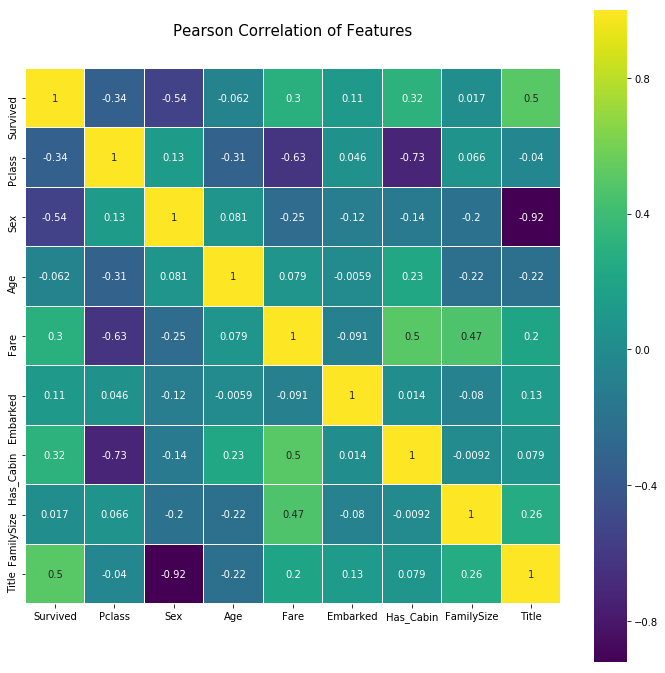

In [102]:
colormap=plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(a, linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [103]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,FamilySize,Title
0,0,3,1,22,0,0,0,2,1.0
1,1,1,0,38,3,1,1,2,3.0
2,1,3,0,26,1,0,0,1,4.0
3,1,1,0,35,3,0,1,2,3.0
4,0,3,1,35,1,0,0,1,1.0
5,0,3,1,35,1,2,0,1,1.0
6,0,1,1,54,3,0,1,1,1.0
7,0,3,1,2,2,0,0,5,2.0
8,1,3,0,27,1,0,0,3,3.0
9,1,2,0,14,2,1,0,2,3.0
